# Sports Celebrity Image Classification

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import pywt

import os

import Augmentor

### (1) Preprocessing

In [2]:
img = cv2.imread('./test_images/img1.jpg')
img.shape

(612, 408, 3)

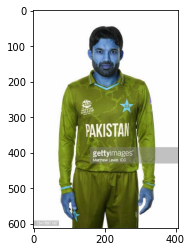

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

In [5]:
gray

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

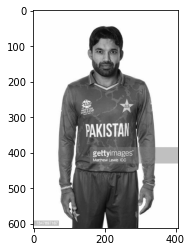

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[155,  77, 105, 105]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(155, 77, 105, 105)

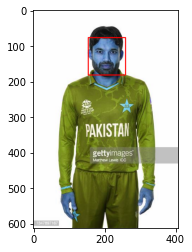

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

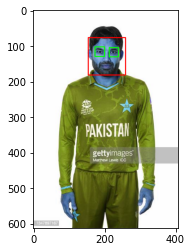

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### (2) Preprocessing: Crop the facial region of the image

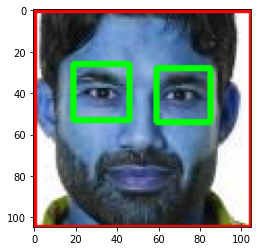

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(105, 105, 3)

### (3) Preprocessing: Use wavelet transform as a feature for traning our model

### Wavelet transform

In [13]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

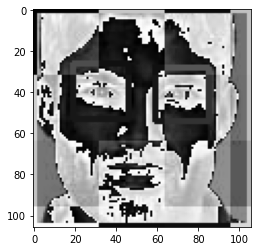

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

### (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
#     print(image_path)
    print(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

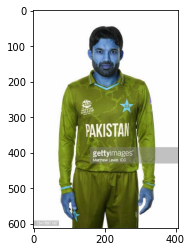

In [16]:
original_image = cv2.imread('./test_images/img1.jpg')
plt.imshow(original_image)

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


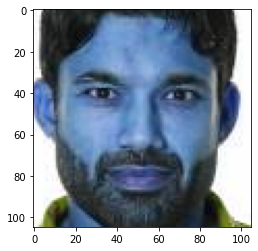

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/img1.jpg')
plt.imshow(cropped_image)

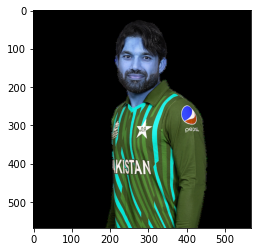

In [18]:
org_image_obstructed = cv2.imread('./test_images/img2.png')
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/img2.png')
cropped_image_no_2_eyes

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 13,  13,  13],
        [  7,   8,   8],
        [ 57,  56,  57]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 22,  22,  22],
        [  0,   0,   0],
        [ 53,  52,  53]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  8,   8,   8],
        [ 20,  19,  19]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 41,  54,  82],
        [ 43,  56,  85],
        [ 46,  61,  94]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 43,  57,  89],
        [ 40,  57,  89],
        [ 48,  67, 103]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 46,  63,  97],
        [ 47,  65, 101],
        [ 34,  49,  71]]

In [20]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [25]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

['./dataset/Babar_Azam',
 './dataset/lionel_messi',
 './dataset/Muhammad_Rizwan',
 './dataset/Naseem_Shah',
 './dataset/Shadab_Khan',
 './dataset/Shaheen_Shah_Afridi',
 './dataset/virat_kohli']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except:
            print("Invalid Path : ", entry.path)
#         print(roi_color)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Babar_Azam
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/Muhammad_Rizwan
Invalid Path :  ./dataset/Muhammad_Rizwan\Muhammad_Rizwan_original_Dream Big Debuts _ Mohammad Rizwan.jpg_d90f70d8-3b89-4799-a898-747833522244.jpg
Invalid Path :  ./dataset/Muhammad_Rizwan\Muhammad_Rizwan_original_Dream Big Debuts _ Mohammad Rizwan.jpg_ed5dd68a-506d-421b-a1db-4c5da4350dd1.jpg
Invalid Path :  ./dataset/Muhammad_Rizwan\rizwanabc.jpg
Generating cropped images in folder:  ./dataset/cropped/Naseem_Shah
Generating cropped images in folder:  ./dataset/cropped/Shadab_Khan
Generating cropped images in folder:  ./dataset/cropped/Shaheen_Shah_Afridi
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


### Image Augmentation

In [29]:
p = Augmentor.Pipeline("./dataset/cropped")

Initialised with 668 image(s) found.
Output directory set to ./dataset/cropped\output.

In [30]:
p.rotate(probability=0.9, max_left_rotation=15, max_right_rotation=15)
p.zoom(probability=0.2, min_factor=1.1, max_factor=1.5)
p.sample(1000)

Processing <PIL.Image.Image image mode=RGB size=108x108 at 0x22EC0D756A0>: 100%|█| 1000/1000 [00:45<00:00, 22.10 Sample


### Manually examine cropped folder and delete any unwanted images

In [31]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Babar_Azam': ['./dataset/cropped/Babar_Azam\\Babar_Azam1.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam10.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam11.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam12.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam13.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam14.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam15.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam16.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam17.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam18.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam19.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam2.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam20.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam21.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam22.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam23.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam24.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam25.png',
  './dataset/cropped/Babar_Azam\\Babar_Azam26.png',


In [32]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Babar_Azam': 0,
 'lionel_messi': 1,
 'Muhammad_Rizwan': 2,
 'Naseem_Shah': 3,
 'Shadab_Khan': 4,
 'Shaheen_Shah_Afridi': 5,
 'virat_kohli': 6}

In [33]:
cel_name = list(celebrity_file_names_dict.keys())

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [34]:
def get_img_planned(imgDir):
    img = cv2.imread(imgDir)
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    return combined

In [35]:
X, y = [], []
celebrity_img_count = {
    'Babar_Azam': 0,
 'lionel_messi': 0,
 'Muhammad_Rizwan': 0,
 'Naseem_Shah': 0,
 'Shadab_Khan': 0,
 'Shaheen_Shah_Afridi': 0,
 'virat_kohli': 0
}

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        X.append(get_img_planned(training_image))
        celebrity_img_count[celebrity_name]+=1
        y.append(class_dict[celebrity_name])     

In [36]:
celebrity_img_count

{'Babar_Azam': 151,
 'lionel_messi': 189,
 'Muhammad_Rizwan': 195,
 'Naseem_Shah': 369,
 'Shadab_Khan': 258,
 'Shaheen_Shah_Afridi': 234,
 'virat_kohli': 272}

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1668, 4096)

## Training Using Different ML Algorithms
### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [38]:
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
def get_mean_test_score(clf, params):
    keys = list(params.keys())
    keys.append("mean_test_score")
    df = pd.DataFrame([])
    for x in keys:
        df[x] = clf.cv_results_["param_"+keys[0]]
    df["mean_test_score"] = clf.cv_results_["mean_test_score"]
    return df

In [41]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'kneighborsclassifier__n_neighbors': [1, 10, 20, 30, 40, 50]
        }  
    },
    'ETC': {
        'model': ExtraTreesClassifier(),
        'params' : {
            'extratreesclassifier__criterion': ["gini", "entropy", "log_loss"],
            'extratreesclassifier__max_features': ["sqrt", "log2", "None"],
        }  
    },
    'MLPClassifier': {
        'model': MLPClassifier(),
        'params' : {
            'mlpclassifier__hidden_layer_sizes': [100, 120],
            'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
            'mlpclassifier__max_iter': [380, 400]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [20, 30, 40, 50, 60]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [10,20,40,80]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
}

In [42]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    print(mp['model'])
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    print(get_mean_test_score(clf, mp['params']))
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

models_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])

KNeighborsClassifier()
  kneighborsclassifier__n_neighbors  mean_test_score
0                                 1         0.847811
1                                10         0.670116
2                                20         0.601904
3                                30         0.577942
4                                40         0.563696
5                                50         0.548706
ExtraTreesClassifier()


C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Muhammad_Haseeb\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(

  extratreesclassifier__criterion extratreesclassifier__max_features  \
0                            gini                               gini   
1                            gini                               gini   
2                            gini                               gini   
3                         entropy                            entropy   
4                         entropy                            entropy   
5                         entropy                            entropy   
6                        log_loss                           log_loss   
7                        log_loss                           log_loss   
8                        log_loss                           log_loss   

   mean_test_score  
0         0.859049  
1         0.824581  
2              NaN  
3         0.853071  
4         0.826831  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
MLPClassifier()
   mlpclassifier__hidden_layer_sizes mlpclassifier__a

,model,best_score,best_params
0,knn,0.847811,{'kneighborsclassifier__n_neighbors': 1}
1,ETC,0.859049,"{'extratreesclassifier__criterion': 'gini', 'e..."
2,MLPClassifier,0.866540,"{'mlpclassifier__activation': 'relu', 'mlpclas..."
3,random_forest,0.829839,{'randomforestclassifier__n_estimators': 60}
4,logistic_regression,0.802092,{'logisticregression__C': 20}
5,svm,0.896542,"{'svc__C': 10, 'svc__kernel': 'rbf'}"


In [50]:
for score in scores:
    print(score["model"], " : ", score["best_score"], " : ", score["best_params"])

knn  :  0.8478105375799048  :  {'kneighborsclassifier__n_neighbors': 1}
ETC  :  0.8590493086649207  :  {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__max_features': 'sqrt'}
MLPClassifier  :  0.8665399453690406  :  {'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': 100, 'mlpclassifier__max_iter': 400}
random_forest  :  0.8298386415476895  :  {'randomforestclassifier__n_estimators': 60}
logistic_regression  :  0.8020923094252485  :  {'logisticregression__C': 20}
svm  :  0.8965419165892259  :  {'svc__C': 10, 'svc__kernel': 'rbf'}


In [51]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [52]:
params = list(model_params.keys())

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
class_dict

{'Babar_Azam': 0,
 'lionel_messi': 1,
 'Muhammad_Rizwan': 2,
 'Naseem_Shah': 3,
 'Shadab_Khan': 4,
 'Shaheen_Shah_Afridi': 5,
 'virat_kohli': 6}

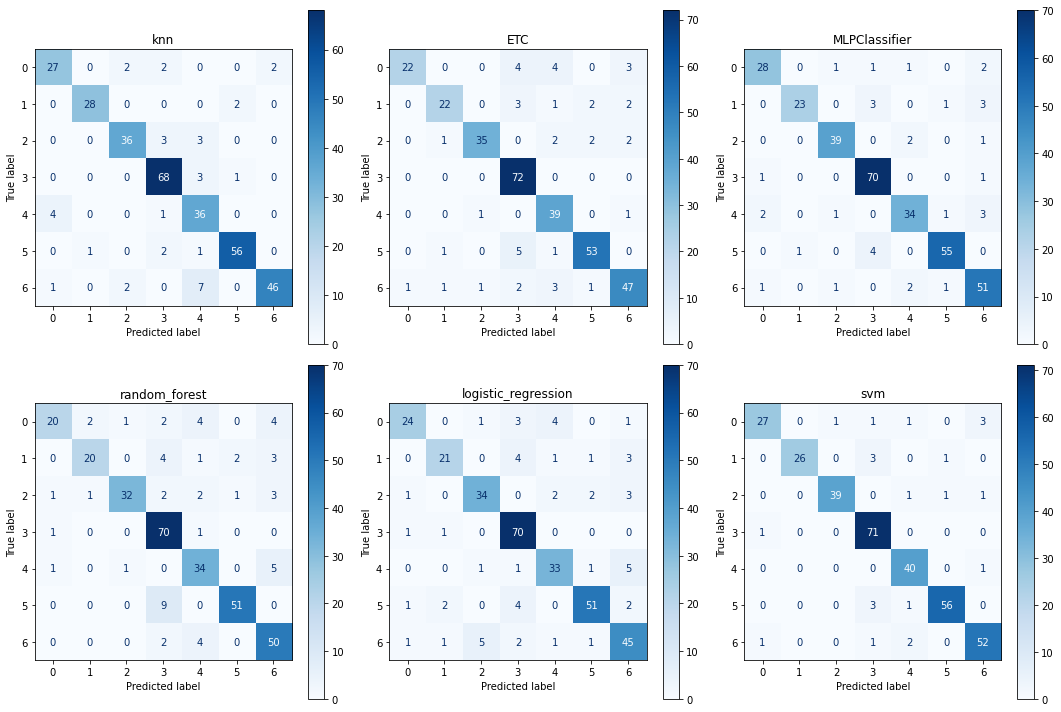

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
for cls, ax in zip(params, axes.flatten()):
    plot_confusion_matrix(best_estimators[cls], 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(cls)
plt.tight_layout()  
plt.show()

In [56]:
class_dict

{'Babar_Azam': 0,
 'lionel_messi': 1,
 'Muhammad_Rizwan': 2,
 'Naseem_Shah': 3,
 'Shadab_Khan': 4,
 'Shaheen_Shah_Afridi': 5,
 'virat_kohli': 6}

In [57]:
for es in params:
    print("Classification Report of ", es)
    print(es)
    print(classification_report(y_test, best_estimators[es].predict(X_test)))
    print()
    print()

Classification Report of  knn
knn
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.97      0.93      0.95        30
           2       0.90      0.86      0.88        42
           3       0.89      0.94      0.92        72
           4       0.72      0.88      0.79        41
           5       0.95      0.93      0.94        60
           6       0.96      0.82      0.88        56

    accuracy                           0.89       334
   macro avg       0.89      0.88      0.88       334
weighted avg       0.90      0.89      0.89       334



Classification Report of  ETC
ETC
              precision    recall  f1-score   support

           0       0.96      0.67      0.79        33
           1       0.88      0.73      0.80        30
           2       0.95      0.83      0.89        42
           3       0.84      1.00      0.91        72
           4       0.78      0.95      0.86        41
        

In [58]:
ModelAcc = pd.DataFrame([], columns=["Accuracy"])

In [59]:
for es in params:
    ModelAcc.loc[es] = round(best_estimators[es].score(X_test, y_test)*100, 2)

ModelAcc

,Accuracy
knn,88.92
ETC,86.83
MLPClassifier,89.82
random_forest,82.93
logistic_regression,83.23
svm,93.11


In [60]:
def get_pred(test_dir):
    if(os.path.isfile(test_dir)):
        img = cv2.imread(test_dir)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        if len(faces)==0:
            return "Use Image with clear face visible"
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                scalled_raw_img = cv2.resize(roi_color, (32, 32))
                img_har = w2d(roi_color,'db1',5)
                scalled_img_har = cv2.resize(img_har, (32, 32))
                combined = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
                pred_ready = combined.reshape(4096).astype(float)
                num = best_estimators["svm"].predict([pred_ready])[0]
                return cel_name[num]
            else:
                return "Please Use Image with clear face visible"
    else:
        print(test_dir, " does not exist")

In [61]:
test_dir = "./test_images/img4.jpg"
get_pred(test_dir)

'Naseem_Shah'